In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import GaussianSmoother
import spikeinterface
import spikeinterface.full as si

import helper_functions as helper
from spikeinterface.sorters import run_sorter_local

# Load the data

In [2]:
local_path= '/mnt/disk20tb/KCNT1_T3_NeuronalScans/000064/data.raw.h5' #network data from chip 16848


recording1 = si.read_maxwell(local_path,stream_id='well001')

#recording = si.ConcatenateSegmentRecording([recording1,recording2])
channel_ids = recording1.get_channel_ids()
fs = recording1.get_sampling_frequency()
num_chan = recording1.get_num_channels()
num_seg = recording1.get_num_segments()
total_recording = recording1.get_total_duration()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

recording_bp = si.bandpass_filter(recording1, freq_min=300, freq_max=3000)

recodring_cmr = si.common_reference(recording_bp, reference='global', operator='median')
#recording_chunk = recodring_cmr.frame_slice(start_frame= 1*fs,end_frame=425*fs)
recording_chunk = recodring_cmr.frame_slice(start_frame= 0*fs,end_frame=100*fs)
#recording_chunk =si.scale(recording_chunk, gain=3.0)
print(f"chunk duration: {recording_chunk.get_total_duration()} s")

Sampling frequency: 10000.0
Number of channels: 878
Number of segments: 1
total_recording: 300.0 s
chunk duration: 100.0 s


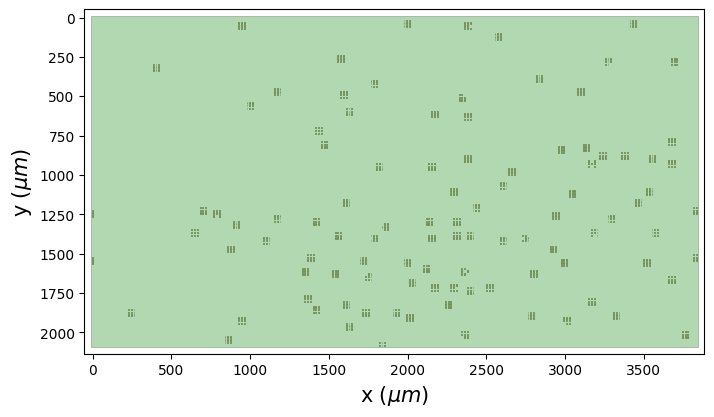

In [3]:
fig,ax = plt.subplots(figsize=(8,8))
si.plot_probe_map(recording1,ax=ax,with_channel_ids=False)
ax.invert_yaxis()

## RUnnig sorting

In [4]:
#aggregated_rec= aggregated_rec.save(fodler="./sorting/recordingtest",progress_bar=True,verbose=True)
output_folder = "./sorting/KCNT1_T3_NeuronalScan9_064_2_KS"
docker_image= "rohanmalige/benshalom:v3"
default_KS2_params = si.get_default_sorter_params('kilosort2')
print(default_KS2_params)
#default_KS2_params['keep_good_only'] = True
default_KS2_params['detect_threshold'] = 5.5
# default_KS2_params['projection_threshold']=[18, 10]
default_KS2_params['n_jobs'] = 32
# global_job_kwargs = dict(n_jobs=32, total_memory="8G", progress_bar=True)
# si.set_global_job_kwargs(**global_job_kwargs)
run_sorter = si.run_sorter('kilosort2',recording=recording_chunk, output_folder=output_folder,docker_image= docker_image,verbose=True,remove_existing_folder=True, **default_KS2_params)

## if running on NERSC:
#run_sorter_local("kilosort2",recording_chunk, output_folder="./sorting/FolicAcid10mg", delete_output_folder=False,verbose=True,with_output=True,**default_KS2_params)
#run_sorter = ss.run_sorter('kilosort2',recording= recording_chunk, output_folder="/mnt/disk15tb/mmpatil/Spikesorting/sorter_output/kilosort2",docker_image= True,verbose=True, **default_KS2_params)

{'detect_threshold': 6, 'projection_threshold': [10, 4], 'preclust_threshold': 8, 'momentum': [20.0, 400.0], 'car': True, 'minFR': 0.1, 'minfr_goodchannels': 0.1, 'freq_min': 150, 'sigmaMask': 30, 'lam': 10.0, 'nPCs': 3, 'ntbuff': 64, 'nfilt_factor': 4, 'NT': None, 'AUCsplit': 0.9, 'wave_length': 61, 'keep_good_only': False, 'skip_kilosort_preprocessing': False, 'scaleproc': None, 'save_rez_to_mat': False, 'delete_tmp_files': ('matlab_files',), 'delete_recording_dat': False, 'n_jobs': 48, 'chunk_duration': '1s', 'progress_bar': True, 'mp_context': None, 'max_threads_per_process': 1}
installation_mode='auto' switching to installation_mode: 'github'
Starting container
Installing neo with pypi in container
Installing h5py with pypi in container
Running kilosort2 sorter inside rohanmalige/benshalom:v3
Stopping container


In [5]:

# loading the KS2 sorted object
sortingKS3 = run_sorter.remove_empty_units()
sortingKS3 = si.remove_excess_spikes(sortingKS3,recording1) #Sometimes KS returns spikes outside the number of samples. < https://github.com/SpikeInterface/spikeinterface/pull/1378>

sortingKS3= sortingKS3.save(folder = './sorting/KCNT1_T3_NeuronalScan9_064_2_KS2',overwrite=True)
#sorting_KS3 = s.Kilosort2Sorter._get_result_from_folder('./sorting/FolicAcidT2M07038_2_KS/sorter_output')
total_units = sortingKS3.get_unit_ids()
print(len(total_units))
#print(len(total_units))
channel_ids = recording_chunk.get_channel_ids()
print(channel_ids)



326
['0' '1' '2' '3' '4' '5' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '19' '20' '21' '22' '23' '25' '26' '27' '28' '29' '30' '31' '33'
 '34' '35' '36' '37' '38' '39' '41' '42' '43' '45' '46' '47' '48' '49'
 '50' '51' '53' '54' '55' '56' '57' '58' '59' '60' '61' '63' '64' '65'
 '66' '67' '68' '69' '70' '71' '73' '74' '75' '76' '77' '78' '79' '81'
 '82' '83' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '97'
 '98' '99' '101' '102' '103' '104' '105' '106' '107' '109' '110' '111'
 '113' '114' '115' '117' '118' '119' '121' '122' '123' '125' '126' '127'
 '129' '130' '131' '133' '134' '135' '136' '137' '138' '139' '141' '142'
 '143' '145' '146' '147' '149' '150' '151' '152' '153' '154' '155' '157'
 '158' '159' '161' '162' '163' '165' '166' '167' '169' '170' '171' '173'
 '174' '175' '177' '178' '179' '181' '182' '183' '185' '186' '187' '189'
 '190' '191' '193' '194' '195' '197' '198' '199' '201' '202' '203' '205'
 '206' '207' '209' '210' '211' '213' '214' '215' '217' '218'

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/core/basesorting.py:239: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")



job_kwargs = dict(n_jobs=32, chunk_duration="1s", progress_bar=False)
sorting_analyzer = spikeinterface.core.create_sorting_analyzer(sortingKS3, recording_chunk,
                                              format="binary_folder", folder="./my_sorting_analyzer",
                                              **job_kwargs)
sorting_analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
sorting_analyzer.compute("waveforms", **job_kwargs)
sorting_analyzer.compute("templates")
sorting_analyzer.compute("noise_levels")
sorting_analyzer.compute("unit_locations", method="monopolar_triangulation")
sorting_analyzer.compute("isi_histograms")
sorting_analyzer.compute("correlograms", window_ms=100, bin_ms=5.)
sorting_analyzer.compute("principal_components", n_components=3, mode='by_channel_global', whiten=True, **job_kwargs)
sorting_analyzer.compute("quality_metrics", metric_names=["snr", "firing_rate"])
sorting_analyzer.compute("spike_amplitudes", **job_kwargs)

In [ ]:
sortingKS3 = si.Kilosort2Sorter._get_result_from_folder("./sorting/KCNT1_T3_NeuronalScan_063_1_KS/sorter_output")

## Extracting the waveforms

In [6]:

job_kwargs = dict(n_jobs=32, chunk_duration="1s", progress_bar=True)
#waveforms = si.extract_waveforms(recording_chunk,sorting_KS3,folder="./waveformsblock1_7min",overwrite=True, ms_before=1., ms_after=2.,**job_kwargs)

#recording1.annotate(is_filtered=True)
waveforms = si.extract_waveforms(recording_chunk,sortingKS3,folder='./sorting/KCNT1_T3_NeuronalScan9_064_2_WF',sparse=False,overwrite=True,**job_kwargs)
print(waveforms)

extract waveforms memmap multi buffer:   0%|          | 0/100 [00:00<?, ?it/s]

WaveformExtractor: 878 channels - 326 units - 1 segments
  before:10 after:20 n_per_units:500


In [23]:
waveforms = si.load_waveforms('/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/KCNT1_T3_NeuronalScan_061_2_WF')

In [24]:
metrics = si.compute_quality_metrics(waveforms, n_jobs=32, progress_bar=True)

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 20, 21, 22, 23, 24, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 47, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 94, 95, 96, 98, 100, 101, 102, 103, 105, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 126, 127, 128, 129, 131, 133, 136, 137, 138, 139, 141, 142, 144, 145, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 169, 170, 171, 175, 176, 177, 178, 179, 182, 183, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228, 230, 231, 232, 233, 234, 237, 238, 239, 240, 241, 242, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 2

In [25]:
metrics

,amplitude_cutoff,amplitude_cv,amplitude_median,firing_range,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8
0,NaN,NaN,107.002258,1.61,0.69,0.000000,0.0,69.0,1.0,0.0,0.0,NaN,NaN,12.463399,0.333333,0.000000,0.0
1,NaN,NaN,201.416016,3.02,1.55,0.000000,0.0,155.0,1.0,0.0,0.0,NaN,NaN,21.261652,0.329032,0.000000,0.0
3,NaN,NaN,31.471252,0.21,0.05,0.000000,0.0,5.0,1.0,0.0,0.0,NaN,NaN,24.416527,0.200000,0.000000,0.0
4,NaN,NaN,56.648254,0.83,0.33,0.000000,0.0,33.0,1.0,0.0,0.0,NaN,NaN,34.889515,0.242424,0.000000,0.0
5,NaN,NaN,69.236755,1.81,1.49,0.000000,0.0,149.0,1.0,0.0,0.0,NaN,NaN,7.423914,0.181208,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.007122,NaN,182.533264,30.27,22.60,0.000000,0.0,2260.0,1.0,0.0,0.0,NaN,0.005,18.764339,0.169469,0.000000,0.0
594,NaN,NaN,62.942505,1.02,0.63,0.000000,0.0,63.0,1.0,0.0,0.0,NaN,NaN,6.777015,0.333333,0.015873,0.0
595,NaN,NaN,28.324127,0.20,0.02,0.000000,0.0,2.0,1.0,0.0,0.0,NaN,NaN,13.152550,0.000000,0.000000,0.0
596,NaN,NaN,75.531006,7.70,2.93,2.717951,7.0,293.0,1.0,1.0,7.0,NaN,NaN,7.881368,0.194539,0.000000,0.0


In [26]:
# Calculate the summary statistics
summary_stats = metrics['num_spikes'].describe()
print(summary_stats)
# Calculate the interquartile range (IQR)
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = metrics[(metrics['num_spikes'] < lower_bound) | (metrics['num_spikes'] > upper_bound)]

# Print the outliers
print(outliers)


count     527.000000
mean      371.299810
std       848.768037
min         1.000000
25%        21.000000
50%        97.000000
75%       274.500000
max      5632.000000
Name: num_spikes, dtype: float64
     amplitude_cutoff  amplitude_cv  amplitude_median  firing_range   
7            0.199930           NaN        321.006775          3.83  \
9            0.006776           NaN         37.765503         16.23   
15           0.001532           NaN         88.119507         14.77   
31           0.000892           NaN         75.531006          6.46   
44           0.003261           NaN        100.708008         44.05   
..                ...           ...               ...           ...   
561          0.032053           NaN        264.358521         11.89   
569          0.454570           NaN        446.891785         31.79   
574          0.173174           NaN        377.655029          8.52   
593          0.007122           NaN        182.533264         30.27   
597          0.003

In [27]:
import mea_analysis_pipeline as msp
import importlib
importlib.reload(msp)
update_metrics = msp.remove_violated_units(metrics)
update_metrics

,amplitude_cutoff,amplitude_cv,amplitude_median,firing_range,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8
1,NaN,NaN,201.416016,3.02,1.55,0.000000,0.0,155.0,1.0,0.0,0.0,NaN,NaN,21.261652,0.329032,0.000000,0.0
5,NaN,NaN,69.236755,1.81,1.49,0.000000,0.0,149.0,1.0,0.0,0.0,NaN,NaN,7.423914,0.181208,0.000000,0.0
6,NaN,NaN,220.298767,4.46,2.01,0.825062,1.0,201.0,1.0,1.0,1.0,NaN,NaN,23.234663,0.273632,0.014925,0.0
7,0.199930,NaN,321.006775,3.83,8.49,0.000000,0.0,849.0,1.0,0.0,0.0,NaN,0.030,31.976252,0.213192,0.002356,0.0
8,NaN,NaN,37.765503,7.47,4.30,0.000000,0.0,430.0,1.0,0.0,0.0,NaN,0.065,5.863352,0.165116,0.002326,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,NaN,NaN,245.475769,3.12,1.59,0.000000,0.0,159.0,1.0,0.0,0.0,NaN,NaN,25.940285,0.377358,0.025157,0.0
588,NaN,NaN,402.832031,4.01,1.60,0.000000,0.0,160.0,1.0,0.0,0.0,NaN,NaN,42.998730,0.443750,0.018750,0.0
592,NaN,NaN,258.064270,5.17,2.61,0.000000,0.0,261.0,1.0,0.0,0.0,NaN,0.310,27.240583,0.283525,0.011494,0.0
593,0.007122,NaN,182.533264,30.27,22.60,0.000000,0.0,2260.0,1.0,0.0,0.0,NaN,0.005,18.764339,0.169469,0.000000,0.0


In [28]:

non_violated_units=  update_metrics.index.values
non_violated_units

array([  1,   5,   6,   7,   8,   9,  11,  13,  15,  20,  21,  22,  23,
        24,  28,  29,  31,  35,  44,  46,  58,  60,  62,  65,  66,  67,
        69,  70,  71,  72,  75,  76,  77,  78,  81,  82,  83,  84,  85,
        88,  91,  93,  96, 103, 104, 106, 110, 111, 112, 117, 120, 122,
       123, 124, 126, 130, 131, 135, 137, 141, 143, 145, 148, 155, 157,
       159, 160, 161, 166, 167, 171, 178, 179, 180, 182, 183, 185, 187,
       191, 198, 199, 200, 201, 203, 204, 208, 212, 215, 220, 228, 229,
       230, 232, 233, 238, 240, 244, 246, 248, 249, 250, 253, 254, 255,
       257, 258, 259, 260, 262, 263, 266, 271, 274, 276, 279, 280, 281,
       287, 288, 290, 292, 293, 294, 295, 300, 301, 302, 303, 307, 308,
       310, 311, 312, 313, 314, 316, 317, 321, 322, 323, 325, 326, 329,
       330, 331, 333, 334, 337, 338, 339, 342, 345, 346, 347, 349, 353,
       355, 359, 360, 361, 364, 365, 366, 367, 369, 370, 371, 374, 376,
       380, 382, 383, 388, 389, 390, 391, 397, 398, 400, 406, 42

In [29]:
extremum_channels_ids =si.get_template_extremum_channel(waveforms,peak_sign ='neg',mode='at_index')
extremum_channels_ids

{0: '1',
 1: '3',
 3: '4',
 4: '850',
 5: '8',
 6: '15',
 7: '17',
 8: '18',
 9: '18',
 10: '18',
 11: '790',
 13: '22',
 15: '31',
 20: '35',
 21: '37',
 22: '219',
 23: '39',
 24: '40',
 27: '550',
 28: '46',
 29: '47',
 30: '47',
 31: '276',
 32: '49',
 33: '49',
 34: '371',
 35: '57',
 36: '59',
 37: '60',
 38: '60',
 40: '737',
 41: '983',
 42: '63',
 43: '63',
 44: '64',
 46: '65',
 47: '592',
 50: '69',
 51: '70',
 52: '70',
 53: '960',
 54: '74',
 55: '75',
 56: '75',
 57: '75',
 58: '76',
 59: '77',
 60: '77',
 61: '77',
 62: '79',
 63: '79',
 64: '544',
 65: '86',
 66: '850',
 67: '89',
 68: '91',
 69: '93',
 70: '99',
 71: '100',
 72: '101',
 74: '106',
 75: '109',
 76: '110',
 77: '111',
 78: '113',
 79: '113',
 80: '114',
 81: '114',
 82: '115',
 83: '134',
 84: '121',
 85: '138',
 87: '895',
 88: '124',
 89: '125',
 90: '128',
 91: '129',
 93: '129',
 94: '274',
 95: '210',
 96: '136',
 98: '141',
 100: '145',
 101: '145',
 102: '149',
 103: '150',
 104: '151',
 105: '152

In [30]:
output= "/home/mmp/Documents/group_analysis/KCNT2_well2/NS1/"

In [14]:

for i, unit_id in enumerate(non_violated_units):
    fig, ax = plt.subplots()
    #print(unit_id)
    wf = waveforms.get_waveforms(unit_id)
    #print(wf.shape)
    #print(int(extremum_channels[unit_id]))
    channel_id_str = str(int(extremum_channels_ids[unit_id]))
    number = waveforms.channel_ids_to_indices([channel_id_str])
    #number =[539]
    #print(number)
    ax.plot(wf[:,:, number[0]].T,  lw=1, color='black', alpha=0.1, linestyle='-', marker='', markersize=0)
    ax.set_title(f"waveforms of a putative neuron")
    ax.set_ylabel("Amplitude (µV)")
    ax.set_xlabel("Sampled timepoints (5e-2 ms)")
    ax.set_facecolor('white')  # Set the background color to black

    # Customize the appearance of tick labels and axes
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    # ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    # ax.spines['left'].set_color('white')
    
    plt.savefig(f'{output}/waveforms/waveforms_unit_id_{unit_id}__channel_id_{channel_id_str}_channel_index_{number[0]}.svg', format='svg',dpi=300)
    plt.close(fig)


In [31]:
import matplotlib.backends.backend_pdf as pdf
# Create a PDF file to save the subplots
pdf_file = f'{output}waveforms/waveforms_subplots.pdf'
with pdf.PdfPages(pdf_file) as pdf_pages:
    # Calculate the number of rows and columns for the subplots
    
    num_cols = 4
    num_rows = 3

    

    # Iterate over the units and plot the waveforms
    for i in range(0,len(non_violated_units),num_rows*num_cols):


        units_to_plot = non_violated_units[i:i+num_rows*num_cols]
        # Create a single figure with the required number of subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), squeeze=False)
        plt.subplots_adjust(hspace=1, wspace=0.5)
        for j, unit_id in enumerate(units_to_plot):
            row = j // num_cols
            col = j % num_cols
            ax = axes[row, col]

            wf = waveforms.get_waveforms(unit_id)
            channel_id_str = str(int(extremum_channels_ids[unit_id]))
            number = waveforms.channel_ids_to_indices([channel_id_str])

            ax.plot(wf[:, :, number[0]].T, lw=1, color='black', alpha=0.1, linestyle='-', marker='', markersize=0)
            ax.set_title(f"Waveforms of Unit {unit_id}")
            ax.set_ylabel("Amplitude (µV)")
            ax.set_ylim(-700, 400)
            ax.set_xlabel("Sampled timepoints (5e-2 ms)")
            ax.set_facecolor('white')
            ax.tick_params(axis='x', colors='black')
            ax.tick_params(axis='y', colors='black')
            ax.spines['top'].set_color('white')
            ax.spines['right'].set_color('white')


        # Remove empty subplots
        num_units_to_plot = len(units_to_plot)
        for i in range(num_units_to_plot, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            ax = axes[row, col]
            ax.axis('off')

        # Save the subplots to the PDF file
        pdf_pages.savefig(fig)
        plt.close(fig)

# Print the path to the PDF file
print(f"Subplots saved to: {pdf_file}")

Subplots saved to: /home/mmp/Documents/group_analysis/KCNT2_well2/NS1/waveforms/waveforms_subplots.pdf


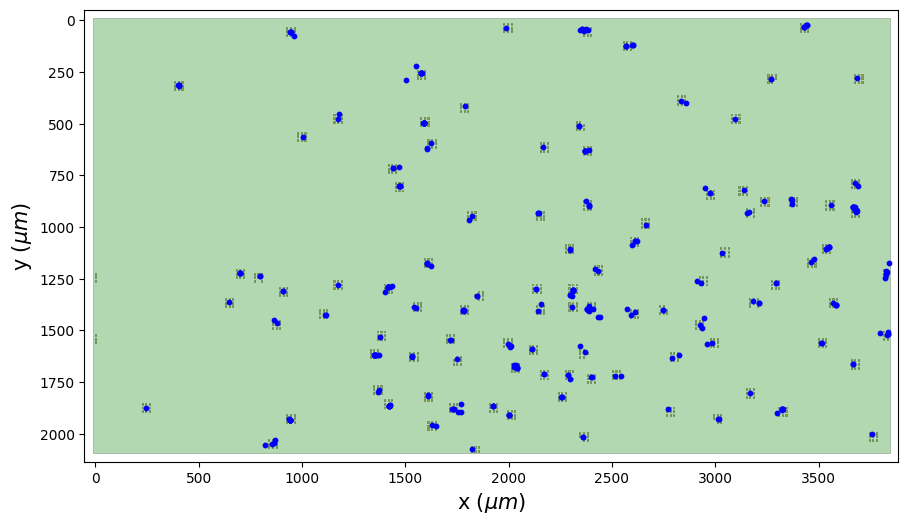

In [16]:

#locations = sp.compute_unit_locations(waveforms)
#non_violated = updated_metrics.index
unit_ids = waveforms.unit_ids
locations = si.compute_unit_locations(waveforms)
#print(locations)
unit_locations =dict(zip(unit_ids,locations))
#print(unit_locations)
#np.savetxt("unitloc_10mins.txt",locations)
fig,ax = plt.subplots(figsize=(10.5,6.5))
si.plot_probe_map(recording1,ax=ax,with_channel_ids=False)
#ax.set_facecolor('#000000') 
#print(len(non_violated))
for unit_id, (x,y,z) in unit_locations.items() :
    #if unit_id in non_violated:
    ax.scatter(x,y, s=10,c='blue')
    
ax.invert_yaxis()
plt.savefig(f'{output}locations.svg',format='svg')

In [17]:
import pandas as pd
x = si.compute_unit_locations(waveforms)
#print(x)
# Convert x to a DataFrame
x_df = pd.DataFrame(x, columns=['LocX', 'LocY', 'LocZ'], index=waveforms.unit_ids)

# Merge the dataframes vertically
combined_df = metrics.copy()
combined_df['LocX'] = x_df['LocX']
combined_df['LocY'] = x_df['LocY']

# Print the combined dataframe
combined_df
# BEGIN: FILEPATH
combined_df = combined_df.loc[non_violated_units].reset_index(drop=True)
combined_df
# END: FILEPATH



,amplitude_cutoff,amplitude_cv,amplitude_median,firing_range,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8,LocX,LocY
0,0.008325,NaN,232.887268,16.30,5.51,0.000000,0.0,551.0,1.0,0.000000,0.0,NaN,0.155,25.486284,0.281307,0.009074,0.0,1604.838438,1175.759611
1,NaN,NaN,195.121765,3.63,1.30,0.000000,0.0,130.0,1.0,0.000000,0.0,NaN,NaN,22.055813,0.269231,0.000000,0.0,864.667685,1449.746248
2,0.302724,NaN,62.942505,4.82,5.07,0.778062,6.0,507.0,1.0,1.000000,6.0,NaN,0.205,4.722779,0.110454,0.000000,0.0,3668.070095,903.475534
3,NaN,NaN,276.947021,8.49,3.68,0.000000,0.0,368.0,1.0,0.000000,0.0,NaN,0.175,29.441141,0.298913,0.005435,0.0,3461.788535,1169.306418
4,0.001605,NaN,239.181519,14.73,6.04,0.000000,0.0,604.0,1.0,0.000000,0.0,NaN,0.115,23.855370,0.286424,0.011589,0.0,877.330932,1464.877655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.001586,NaN,31.471252,12.33,22.68,0.019441,3.0,2268.0,1.0,0.029599,3.0,NaN,0.015,4.883307,0.082011,0.000000,0.0,2035.647510,1668.097237
122,NaN,NaN,125.885010,2.07,1.01,0.000000,0.0,101.0,1.0,0.000000,0.0,NaN,NaN,56.864170,0.118812,0.000000,0.0,1472.546683,800.707465
123,NaN,NaN,226.593018,8.34,3.89,0.440565,2.0,389.0,1.0,0.000000,0.0,NaN,NaN,9.857265,0.285347,0.002571,0.0,2381.368706,1396.835044
124,NaN,NaN,229.740143,4.63,1.14,0.000000,0.0,114.0,1.0,0.000000,0.0,NaN,NaN,23.950302,0.289474,0.008772,0.0,1820.635781,946.061753


In [18]:
fs=recording1.get_sampling_frequency()
t_start = 0 
t_end = int(300 * fs)
dt = 1
frame_numbers = t_end
spike_array = np.zeros((len(non_violated_units),frame_numbers), dtype= int)
for idx, unit_id in enumerate(non_violated_units):
    spike_train = sortingKS3.get_unit_spike_train(unit_id,start_frame=t_start,end_frame=t_end)
    for spike_time in spike_train:
        spike_array[idx,spike_time] = 1


In [57]:
import numpy as np
spike_array.shape

np.savez( f"{output}spike_array_original.npz", data=spike_array)


In [20]:
import scipy.signal as signal

# Define the original sampling frequency and the target sampling frequency
original_fs = recording1.get_sampling_frequency()
target_fs = 100

# Calculate the resampling factor
resampling_factor = original_fs / target_fs

# Resample th spike_array
downsampled_spike_array = signal.resample(spike_array, int(spike_array.shape[1] / resampling_factor), axis=1)


In [36]:
downsampled_spike_array

array([[-1.00535222e-04,  1.01477318e-04, -1.02435564e-04, ...,
         9.78019159e-05, -9.86979003e-05,  9.96088780e-05],
       [-9.31521325e-05,  9.41234993e-05, -9.51151927e-05, ...,
         9.03538676e-05, -9.12679040e-05,  9.22004672e-05],
       [ 7.20033589e-05, -7.36665242e-05,  7.53938119e-05, ...,
        -6.73651725e-05,  6.88557914e-05, -7.04008544e-05],
       ...,
       [ 1.72102097e-04, -1.73673411e-04,  1.75273823e-04, ...,
        -1.67554916e-04,  1.69043604e-04, -1.70559085e-04],
       [-1.04679051e-05,  1.04903450e-05, -1.05131506e-05, ...,
         1.04026698e-05, -1.04240781e-05,  1.04458197e-05],
       [ 3.08611612e-03, -4.33637847e-03,  1.15592364e-02, ...,
        -1.81195484e-03,  2.08615581e-03, -2.47319486e-03]])

In [47]:
import numpy as np

# Assuming spike_array is your original array and original_fs is the original sampling frequency

# Define the target sampling frequency
target_fs = 100

# Calculate the resampling factor
resampling_factor = int(original_fs / target_fs)

# Calculate the number of bins needed
num_bins = spike_array.shape[1] // resampling_factor

# Reshape the array to the number of bins and check for any spike in each bin
downsampled_spike_array = np.any(spike_array[:, :num_bins * resampling_factor].reshape(spike_array.shape[0], num_bins, resampling_factor), axis=2).astype(int)


In [54]:
spike_array.shape

(126, 3000000)

In [55]:
count_ones = np.count_nonzero(downsampled_spike_array)
print(count_ones)
downsampled_spike_array.shape

97221


(126, 30000)

In [52]:
output

'/home/mmp/Documents/group_analysis/KCNT2_well2/NS1/'

In [53]:
import numpy as np
import scipy.io as sio

# Save as .npz format
np.savez(f'{output}/spikearray.npz', data=downsampled_spike_array)

# Save as .mat format
sio.savemat(f'{output}/spikearray.mat', {'data': downsampled_spike_array})


combined_df.to_excel(f'{output}/unitinfos.xlsx', index=False)



In [33]:
import numpy as np

# Load the npz data
data = np.load('/home/mmp/Documents/group_analysis/KCNT2_well2/NS1/spikearray.npz')

# Access the loaded data
loaded_spike_array = data['data']

# Print the loaded spike array
print(loaded_spike_array)


[[ 4.44511101e-05 -4.47808408e-05  4.51311727e-05 ... -4.35658785e-05
   4.38453321e-05 -4.41398807e-05]
 [-4.53122575e-05  4.61411465e-05 -4.70079649e-05 ...  4.30306664e-05
  -4.37590894e-05  4.45189570e-05]
 [-3.17263120e-05  3.18992807e-05 -3.20739148e-05 ...  3.12171651e-05
  -3.13852770e-05  3.15549851e-05]
 ...
 [ 1.13996239e-05 -1.14398696e-05  1.14803970e-05 ... -1.12805504e-05
   1.13199670e-05 -1.13596573e-05]
 [-5.53857561e-04  6.63523453e-04 -8.37270132e-04 ...  3.78277349e-04
  -4.21645227e-04  4.77804348e-04]
 [ 2.12438929e-04 -2.15068685e-04  2.17638124e-04 ... -2.04498733e-04
   2.07132190e-04 -2.09784931e-04]]
